In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [10]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

In [11]:
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
test_data['Sex'] = label_encoder.transform(test_data['Sex'])

In [12]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

In [13]:
train_data['IsAlone'] = (train_data['FamilySize'] == 1).astype(int)
test_data['IsAlone'] = (test_data['FamilySize'] == 1).astype(int)

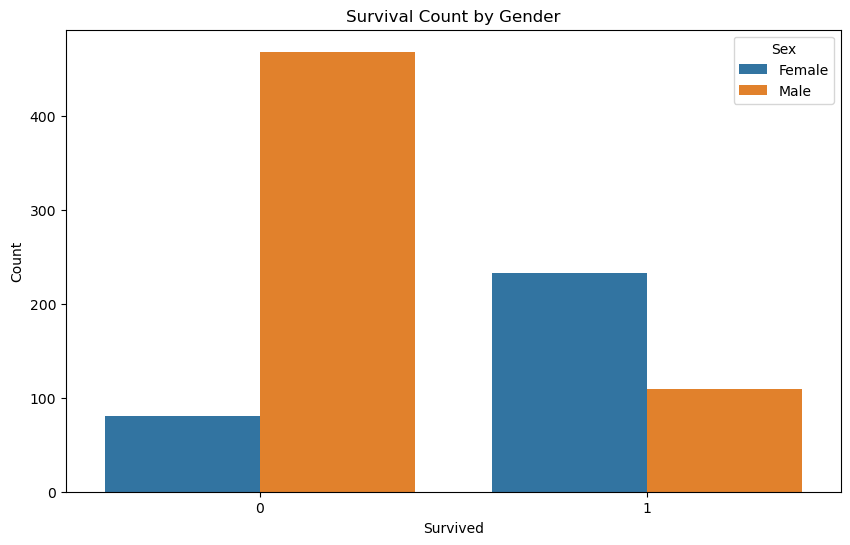

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.title('Survival Count by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()

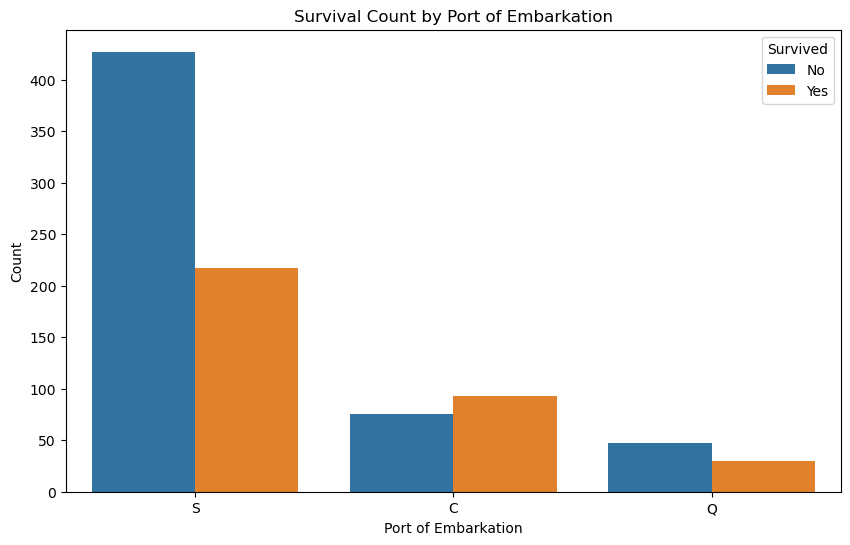

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', hue='Survived', data=train_data)
plt.title('Survival Count by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

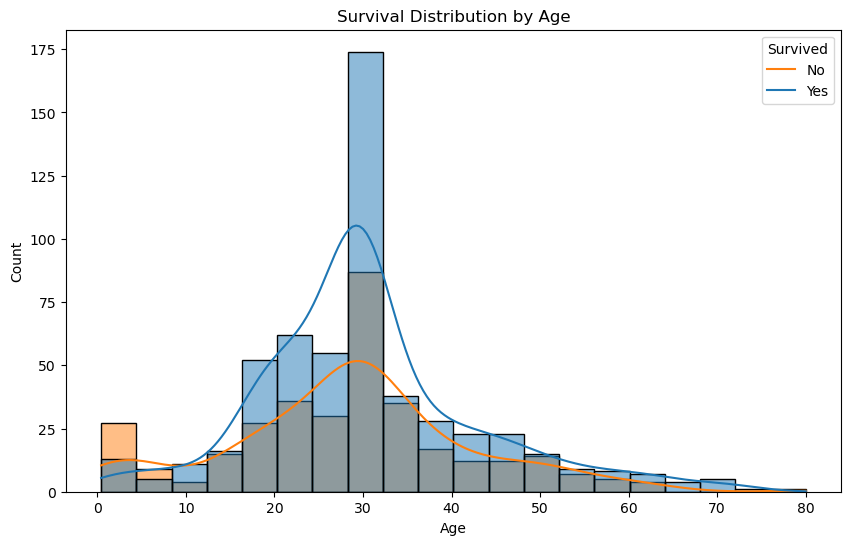

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', hue='Survived', data=train_data, kde=True, bins=20)
plt.title('Survival Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

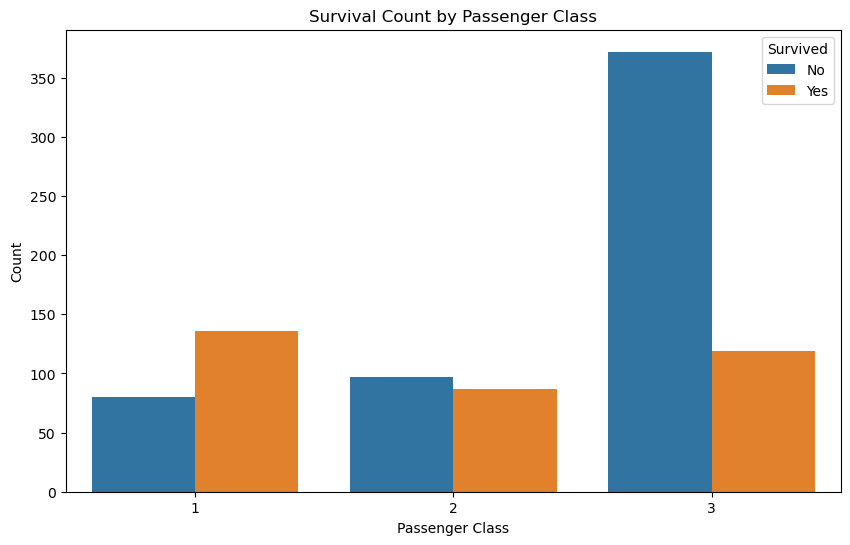

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [41]:
X_rf = train_data[['Sex', 'Age', 'Pclass', 'FamilySize', 'IsAlone']]
y_rf = train_data['Survived']

In [42]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_rf, y_rf)

RandomForestClassifier(random_state=42)

In [43]:
train_data['RF_Predictions'] = rf_model.predict(X_rf)
test_data['RF_Predictions'] = rf_model.predict(test_data[['Sex', 'Age', 'Pclass', 'FamilySize', 'IsAlone']])

In [44]:
X_nn = train_data[['Sex', 'Age', 'Pclass', 'FamilySize', 'IsAlone', 'RF_Predictions']]
y_nn = train_data['Survived']

In [45]:
X_train, X_valid, y_train, y_valid = train_test_split(X_nn, y_nn, test_size=0.2, random_state=42)

In [46]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [47]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [50]:
from tensorflow.keras.callbacks import EarlyStopping

In [51]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [53]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid), callbacks=[early_stopping], verbose=1)

Epoch 1/10
23/23 [==============================] - 0s 8ms/step - loss: 0.2804 - accuracy: 0.9101 - val_loss: 0.2205 - val_accuracy: 0.9330
Epoch 2/10
23/23 [==============================] - 0s 5ms/step - loss: 0.2806 - accuracy: 0.9087 - val_loss: 0.2162 - val_accuracy: 0.9330
Epoch 3/10
23/23 [==============================] - 0s 4ms/step - loss: 0.2825 - accuracy: 0.9073 - val_loss: 0.2311 - val_accuracy: 0.9330
Epoch 4/10
23/23 [==============================] - 0s 4ms/step - loss: 0.2823 - accuracy: 0.9101 - val_loss: 0.2230 - val_accuracy: 0.9330
Epoch 5/10
23/23 [==============================] - 0s 4ms/step - loss: 0.2834 - accuracy: 0.9129 - val_loss: 0.2228 - val_accuracy: 0.9330
Epoch 6/10
23/23 [==============================] - 0s 4ms/step - loss: 0.2861 - accuracy: 0.9115 - val_loss: 0.2224 - val_accuracy: 0.9330
Epoch 7/10
23/23 [==============================] - 0s 4ms/step - loss: 0.2866 - accuracy: 0.9101 - val_loss: 0.2252 - val_accuracy: 0.9330


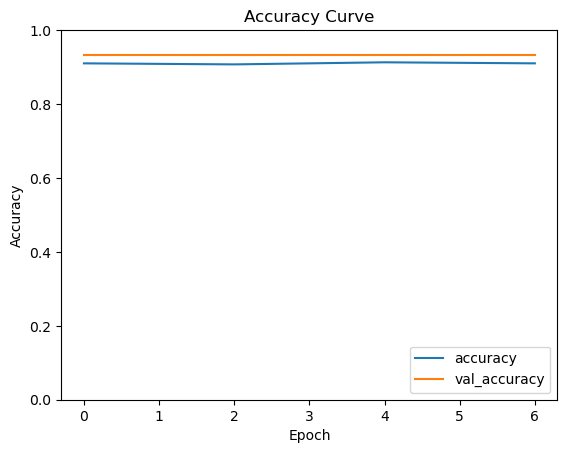

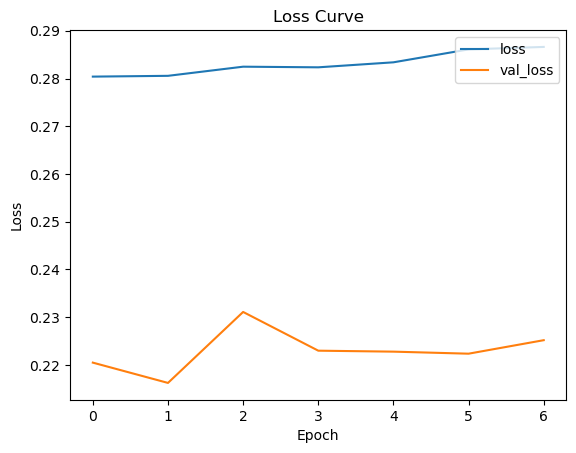

In [54]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Accuracy Curve')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss Curve')
plt.show()

In [55]:
from sklearn.metrics import classification_report

nn_predictions = (model.predict(X_valid) > 0.5).astype("int32")
print("Neural Network Classification Report:")
print(classification_report(y_valid, nn_predictions))


6/6 [==============================] - 0s 2ms/step
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       105
           1       0.94      0.89      0.92        74

    accuracy                           0.93       179
   macro avg       0.93      0.93      0.93       179
weighted avg       0.93      0.93      0.93       179



In [56]:
comparison_df = pd.DataFrame({
    'PassengerId': X_valid.index,
    'Predicted': nn_predictions.flatten(),
    'GroundTruth': y_valid
})

print("Comparison of Predictions vs Ground Truth:")
print(comparison_df)


6/6 [==============================] - 0s 2ms/step
Comparison of Predictions vs Ground Truth:
     PassengerId  Predicted  GroundTruth
709          709          1            1
439          439          0            0
840          840          0            0
720          720          1            1
39            39          1            1
..           ...        ...          ...
433          433          0            0
773          773          0            0
25            25          1            1
84            84          1            1
10            10          1            1

[179 rows x 3 columns]


In [57]:
nn_predictions = (model.predict(X_valid) > 0.5).astype("int32")
nn_accuracy = accuracy_score(y_valid, nn_predictions)
print("Neural Network Validation Accuracy:", nn_accuracy)

6/6 [==============================] - 0s 2ms/step
Neural Network Validation Accuracy: 0.9329608938547486


In [58]:
test_X_nn = test_data[['Sex', 'Age', 'Pclass', 'FamilySize', 'IsAlone', 'RF_Predictions']]
test_nn_predictions = (model.predict(test_X_nn) > 0.5).astype("int32")

14/14 [==============================] - 0s 2ms/step


In [60]:
print("Real-time Predictions:")
print(test_nn_predictions.flatten())

Real-time Predictions:
[0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1
 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0
 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 0 1 0 1 0 0 1 0 0 1]


In [61]:
submission = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': test_nn_predictions.flatten()})
submission.to_csv('yadi_submission.csv', index=False)